In [6]:
from collections import deque

def bfs_path(grid, start, goal):
    print("Grid:", grid)
    rows = len(grid)
    cols = len(grid[0])

    if not (0 <= start[0] < rows and 0 <= start[1] < cols):
        print("the start agent not on the map")
        return None
    if not (0 <= goal[0] < rows and 0 <= goal[1] < cols):
        print("the end agent not on the map")
        return None
    if grid[start[0]][start[1]] == 1 or grid[goal[0]][goal[1]] == 1:
        print("the agent starts in the wall.")
        return None

    visited = [[False]*cols for _ in range(rows)]
    parent = dict()

    queue = deque([start])
    visited[start[0]][start[1]] = True
    found = False

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while queue and not found:
        r, c = queue.popleft()
        if (r, c) == goal:
            found = True
            break

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                if not visited[nr][nc] and grid[nr][nc] == 0:
                    visited[nr][nc] = True
                    parent[(nr, nc)] = (r, c)
                    queue.append((nr, nc))

    if not found:
        print("not found")
        return None

    # Retrace the path
    path = []
    cur = goal
    while cur != start:
        path.append(cur)
        cur = parent[cur]
    path.append(start)
    path.reverse()
    return path


def test_bfs():
    # A 4x4 grid:
    #  0 = free cell
    #  1 = wall
    #
    #  Let's place a single wall at (1,1) and (1,2).
    #  BFS should find a path from (0,0) to (3,3).
    grid = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    start = (0, 0)
    goal = (3, 3)

    path = bfs_path(grid, start, goal)
    print("Resulting path:", path)

test_bfs()



Grid: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
the agent starts in the wall.
Resulting path: None


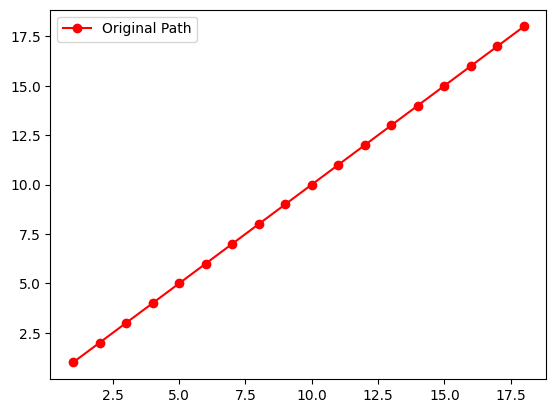

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import heapq

def astar(start, goal, maze):
    def heuristic(a, b):
        return np.linalg.norm(np.array(a) - np.array(b))  # Euclidean distance

    neighbors = [(1,0), (-1,0), (0,1), (0,-1), (1,1), (-1,-1), (1,-1), (-1,1)]
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            break

        for dx, dy in neighbors:
            next_node = (current[0] + dx, current[1] + dy)
            if next_node in maze and maze[next_node] == 0:  # Free space
                new_cost = cost_so_far[current] + heuristic(current, next_node)
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + heuristic(goal, next_node)
                    heapq.heappush(open_list, (priority, next_node))
                    came_from[next_node] = current

    # Reconstruct path
    path = []
    node = goal
    while node:
        path.append(node)
        node = came_from.get(node, None)
    
    return path[::-1]

# Define the maze (0 = free, 1 = obstacle)
maze = {(x, y): 0 for x in range(20) for y in range(20)}  # Empty 20x20 maze
path = astar((1, 1), (18, 18), maze)

# Smooth the path using splines
path_np = np.array(path)
#tck, u = splprep([path_np[:,0], path_np[:,1]], s=2)
# smooth_path = splev(np.linspace(0, 1, 100), tck)

# Plot results
plt.plot(path_np[:,0], path_np[:,1], 'ro-', label="Original Path")
#plt.plot(smooth_path[0], smooth_path[1], 'b-', label="Smoothed Path")
plt.legend()
plt.show()